# Evaultion of the models

In [1]:
# Set root directory of the project as the current working directory
import os
initial_dir = os.getcwd()  # Save initial directory (notebooks/)
os.chdir('..')  # Move to project/

# Import necessary modules
from config.defaults import Config
from src.models import load_preprocessed_data, load_saved_model
from src.evaluation import evaluate_regression_model, evaluate_classification_model
from src.utils import plot_predictions_vs_actual

# Load the default configuration
config = Config()

## MIT_Stanford

## Regression

### LSTM

2025-04-10 11:27:28,888 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.8


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0169 - mae: 0.1073  
RMSE: 0.09419647831324696
MAE: 0.06826484948396683
R2: 0.687730644052655


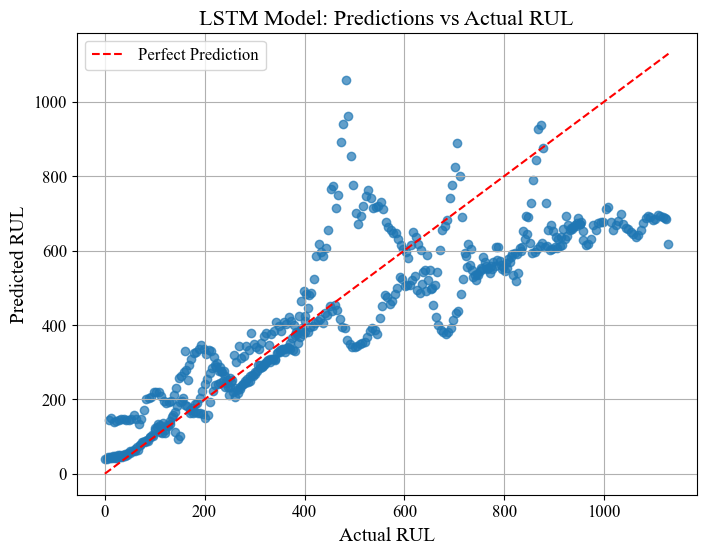

In [2]:
config.model_task = "lstm_regression"  # Set the model task
config.use_aachen = False  # Set the dataset

lstm_model = load_saved_model(config)


# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    config.model_task, config.eol_capacity, config.use_aachen
)
y_pred = lstm_model.predict(X_test)

# Evaluate the model
rmse, mae, r2 = evaluate_regression_model(lstm_model, X_test, y_test)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")   
print(f"R2: {r2}")

# Plot predictions vs actual values
plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="LSTM Model: Predictions vs Actual RUL")


### DecisionTree Regressor

2025-04-10 11:10:10,997 - INFO - Test Loss (MSE): 0.0106
2025-04-10 11:10:10,998 - INFO - Test MAE (rescaled): 134.1696


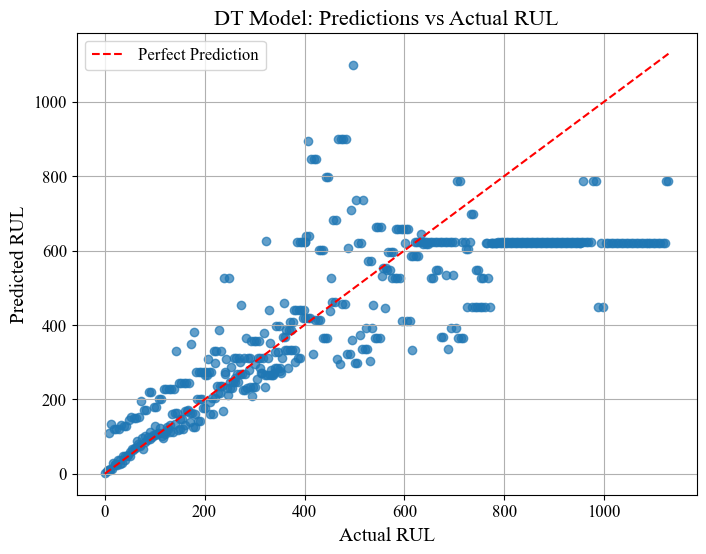

In [5]:
config.use_aachen = False # Activate MIT_Stanford dataset
config.model_task = "dt_regression" 

dt_model = load_saved_model(config)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = dt_model.predict(X_test_flat)
evaluate_regression_model(dt_model, X_test_flat, y_test, metadata["y_max"])

plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="DT Model: Predictions vs Actual RUL")

### Linear Regression

2025-04-10 11:11:16,855 - INFO - Test Loss (MSE): 0.0134
2025-04-10 11:11:16,883 - INFO - Test MAE (rescaled): 180.4593


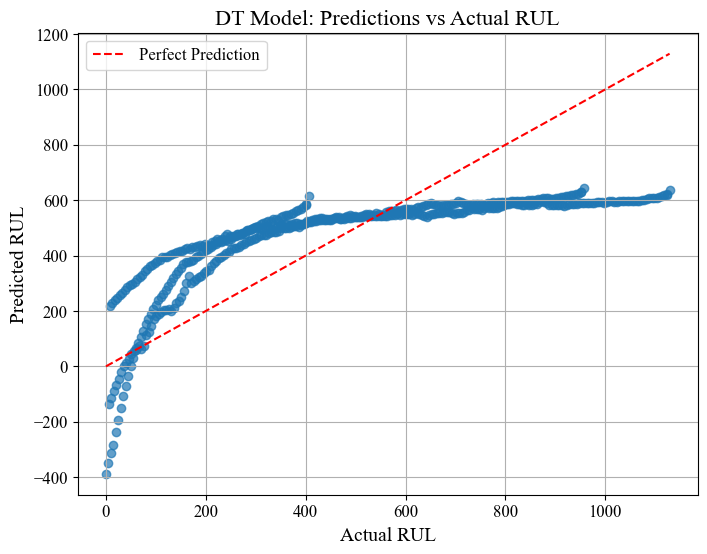

In [ ]:
config.use_aachen = False # Activate MIT_Stanford dataset
config.model_task = "lr_regression" 

lr_model = load_saved_model(config)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = lr_model.predict(X_test_flat)
evaluate_regression_model(lr_model, X_test_flat, y_test, metadata["y_max"])

plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="LR Model: Predictions vs Actual RUL")

### Lasso Regression

2025-04-10 11:12:26,926 - INFO - Test Loss (MSE): 0.0134
2025-04-10 11:12:26,928 - INFO - Test MAE (rescaled): 180.4641


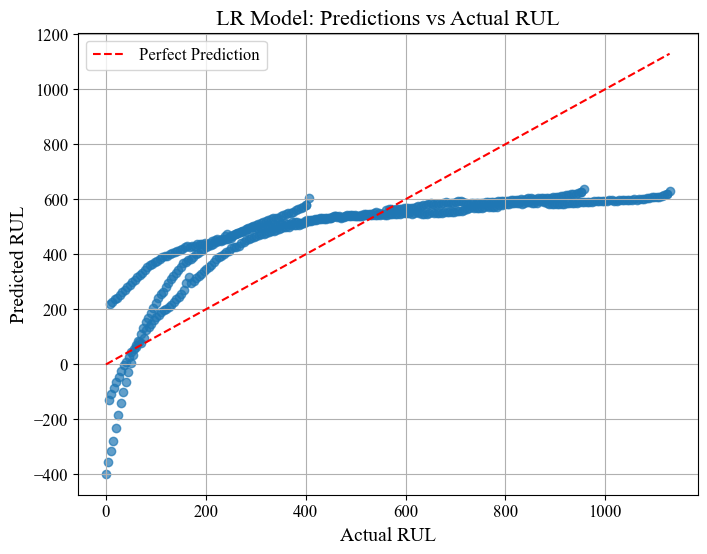

In [ ]:
config.use_aachen = False # Activate MIT_Stanford dataset
config.model_task = "lasso_regression" 

lasso_model = load_saved_model(config)

X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_pred = lasso_model.predict(X_test_flat)
evaluate_regression_model(lasso_model, X_test_flat, y_test, metadata["y_max"])

plot_predictions_vs_actual(config, y_test, y_pred, metadata["y_max"], title="Lasso Model: Predictions vs Actual RUL")

## Classification

### CNN

2025-04-10 12:54:57,377 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.8


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.7249 - loss: 0.7090


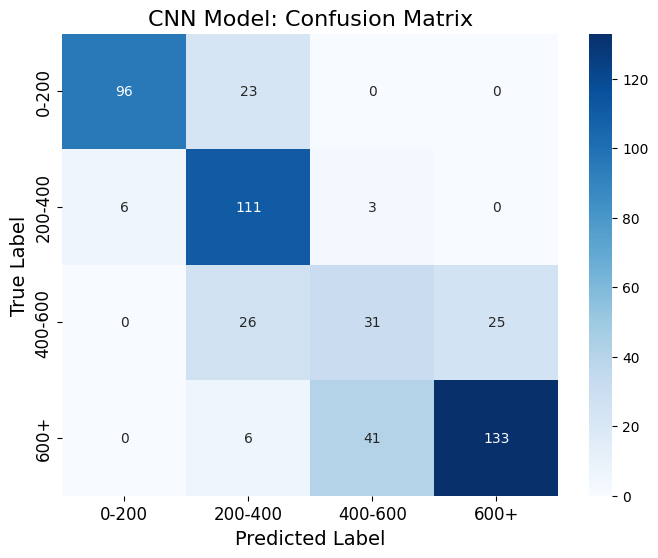

2025-04-10 12:54:57,830 - INFO - Classification Report:
              precision    recall  f1-score   support

       0-200       0.94      0.81      0.87       119
     200-400       0.67      0.93      0.78       120
     400-600       0.41      0.38      0.39        82
        600+       0.84      0.74      0.79       180

    accuracy                           0.74       501
   macro avg       0.72      0.71      0.71       501
weighted avg       0.75      0.74      0.74       501



In [ ]:
config.use_aachen = False  # Activate MIT_Stanford dataset
config.model_task = "cnn_classification"  

cnn_model = load_saved_model(config)

# Load preprocessed data
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    config.model_task, config.eol_capacity, config.use_aachen
)

evaluate_classification_model(config, cnn_model, X_test, y_test, labels=config.labels, title="CNN Model: Confusion Matrix")